# EXERCISE
You now know a few xarray basics. Time to put it to the test!!

Your challenge is to plot the mean zonal wind speed over australia from 1st June 2019 to 30th August 2019 (winter)

Use the zonal_wind_2019.nc file

## Solution

In [7]:
import xarray

In [8]:
#Load In Dataset
ds = xarray.open_dataset('zonal_wind_2019.nc')

In [9]:
#View the Dataset
ds

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-08-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-03-27 03:08:50 GMT by grib_to_netcdf-2.21.0: grib_to_n...

In [10]:
#Assign the data to a variable
z_wind = ds.u10

In [11]:
#View the variable
z_wind

<xarray.DataArray 'u10' (time: 8, latitude: 241, longitude: 480)>
[925440 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-08-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

#Slice the data for winter and to cover australia
w_zwind = z_wind.sel(time = slice('2019-06-01T00:00:00.000000000','2019-08-01T00:00:00.000000000')).sel(longitude=slice(20,160),latitude=slice(-80,25))

In [13]:
#Slice the data for winter 
w_zwind = z_wind.sel(time = slice('2019-06-01','2019-08-01'))


In [14]:
#Slice the data to cover just Australia ()
aust_w_wind = w_zwind.sel(longitude=slice(110,156),latitude=slice(0,-50))


In [15]:
aust_w_wind

<xarray.DataArray 'u10' (time: 3, latitude: 67, longitude: 62)>
array([[[-0.428058, -0.415844, ...,  0.234553,  0.110886],
        [-0.805166, -0.653635, ...,  0.201728,  0.078443],
        ...,
        [ 6.293475,  6.151868, ...,  7.468311,  7.359912],
        [ 6.22248 ,  6.097287, ...,  7.711065,  7.629384]],

       [[-0.471188, -0.487983, ...,  1.339541,  1.376947],
        [-0.850968, -0.810891, ...,  0.692961,  0.711282],
        ...,
        [ 9.463015,  9.6676  , ...,  6.485464,  6.36485 ],
        [ 9.356142,  9.448892, ...,  6.57287 ,  6.415233]],

       [[-0.18225 , -0.299429, ...,  1.484964,  1.445269],
        [-0.554778, -0.621955, ...,  1.146025,  1.097169],
        ...,
        [ 7.7958  ,  7.952674, ...,  7.936261,  7.889695],
        [ 7.791983,  7.980155, ...,  8.087791,  7.992751]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 110.2 111.0 111.8 112.5 ... 154.5 155.2 156.0
  * latitude   (latitude) float32 0.0 -0.75 -1.5 -2.25 ... -48.0 -48.75 -49.5
  * time       (time) datetime64[ns] 2019-06-01 2019-07-01 2019-08-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

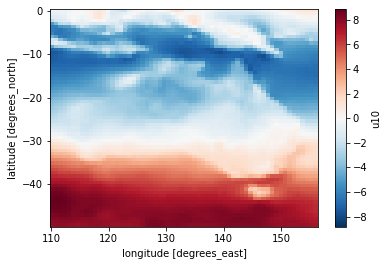

In [16]:
aust_w_wind.mean(dim = 'time').plot()

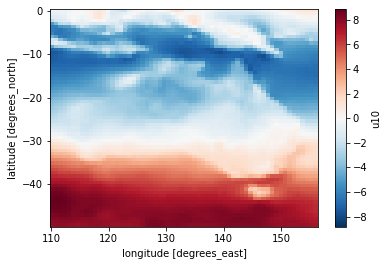

In [17]:
#Alternativley you can do this all in one big line of code
z_wind.sel(time = slice('2019-06-01','2019-08-01')).sel(longitude=slice(110,156),latitude=slice(0,-50)).mean(dim = 'time').plot()